In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## making regression dataset
from sklearn.datasets import make_regression

In [43]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [44]:
X=pd.DataFrame(x,columns=['f1','f2'])

<AxesSubplot: xlabel='f1', ylabel='f2'>

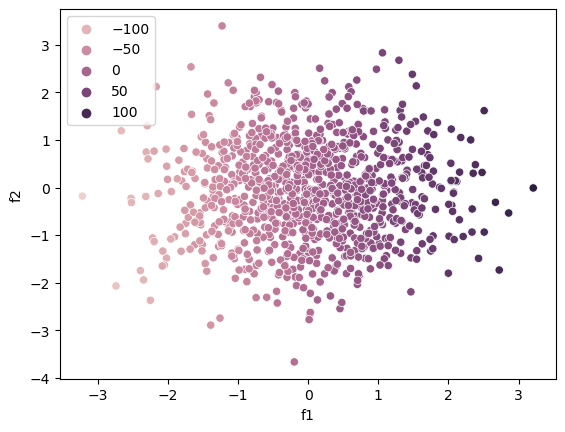

In [45]:
sns.scatterplot(x=X['f1'],y=X['f2'],hue=y)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [48]:
from sklearn.svm import SVR

In [49]:
svr=SVR(kernel='linear')

In [50]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [51]:
svr.coef_

array([[39.46921008,  3.06076012]])

In [52]:
y_pred=svr.predict(x_test)

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test,y_pred)

0.9950004570031117

## Hyperparameter Tuning

In [64]:
parameter={'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
          'kernel':['linear'],
          'epsilon':[0.1,0.2,0.3]}

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
gsc=GridSearchCV(SVR(),param_grid=parameter,cv=5,refit=True,verbose=3)

In [67]:
gsc.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [68]:
gsc.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [69]:
y_pred=gsc.predict(x_test)

In [70]:
r2_score(y_test,y_pred)

0.995049685478541